# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment


# Load Reacher env with 20 agents
# env = UnityEnvironment(file_name='Reacher')
env = UnityEnvironment(
    file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis_OneAgent/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
# print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33


### 3. Instantiate DDPG Agent

In [4]:
from agent import Agent

random_seed = 7

agent = Agent(s_size=state_size, a_size=action_size, random_seed=random_seed)

### 4. Train the Agent with DDPG

In [5]:
from collections import deque
import numpy as np
import time
import torch

n_episodes=1000
R_goal=30 # TOCHECK
R_deque = deque(maxlen=100)
Rs = [] # plot
meanRs_deque = [] # plot

In [6]:
# γ=0.999 # gamma

In [7]:
for i_episode in range(n_episodes):
    
    # Reset Env and Agent
    env_info = env.reset(train_mode=True)[brain_name]       # reset the environment (env)    
    s = env_info.vector_observations[0]                   # get the current state (s) (for an agent)
    s_ = np.zeros_like(s)

    R = 0                            # initialize the total score (R) (for an agent)

    #for i_step in range(n_steps):
    while True:
        
        s = np.reshape(s, [1, -1])
        s_ = np.reshape(s_, [1, -1])
        a = agent.act(s, s_) # a: action [-1, +1], s: current state for an agent
        #print(a.shape)
        
        # Exploration noise
        # noise = np.random.normal(loc=0, scale=0.1, size=[num_agents, action_size])
        # A += noise
        # A = np.clip(a=A, a_min=-1, a_max=1)

        env_info = env.step(a)[brain_name]            # send an action (a) to the environment (env)
        s2 = env_info.vector_observations[0]          # get next state (s) (for an agent)
        r = env_info.rewards[0]                          # get reward (for an agent)
        done = env_info.local_done[0]               # see if episode is done/finished (terminal) for an agent
        
        #s2_, q_ = agent.env(s,a) # q_
        s2_, _ = agent.env(s, a) # q_
        #print(s2_.shape, q.shape)
        
        # a2 = agent.act(s2, s2_)
        # _, q2_ = agent.env(s2, a2)
        # q = r + (γ * q2_ * (1-done))
        # r_ = (q-q_)**2
        # print(q_ - (r + (γ * q2_ * (1-done))))
        # print(r_)        

        #for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
        #for s, a, r, s2, done in zip(S, A, rewards, S2, dones):
        agent.step(s, a, r, s2, done, s_, s2_) # send an exprience (e) to the agent or collecting experiences (E)

        R += r                           # update the total score (for an agent)
        s = s2                                # roll over state (s) to next state (s2)
        s_ = s2_

        # if i_step%learn_every == 0:
        # for _ in range(n_learn):
        agent.start_learn()

        if done: # exit loop if episode is done/finished for an agent
            break

    Rs.append(R) # plot
    R_deque.append(R)
    meanRs_deque.append(np.mean(R_deque)) # plot

    print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode+1, np.mean(R_deque)))  
    if np.mean(R_deque) >= R_goal:
        torch.save(agent.g.state_dict(), 'g-reacher2.pth')
        torch.save(agent.d.state_dict(), 'd-reacher2.pth')
        break

Episode 1	Total Average Score: 0.00
Episode 2	Total Average Score: 0.00
Episode 3	Total Average Score: 0.00
Episode 4	Total Average Score: 0.15
Episode 5	Total Average Score: 0.23
Episode 6	Total Average Score: 0.41
Episode 7	Total Average Score: 0.43
Episode 8	Total Average Score: 0.55
Episode 9	Total Average Score: 0.53
Episode 10	Total Average Score: 0.59
Episode 11	Total Average Score: 0.58
Episode 12	Total Average Score: 0.58
Episode 13	Total Average Score: 0.54
Episode 14	Total Average Score: 0.55
Episode 15	Total Average Score: 0.55
Episode 16	Total Average Score: 0.52
Episode 17	Total Average Score: 0.55
Episode 18	Total Average Score: 0.54
Episode 19	Total Average Score: 0.55
Episode 20	Total Average Score: 0.59
Episode 21	Total Average Score: 0.63
Episode 22	Total Average Score: 0.61
Episode 23	Total Average Score: 0.59
Episode 24	Total Average Score: 0.61
Episode 25	Total Average Score: 0.61
Episode 26	Total Average Score: 0.60
Episode 27	Total Average Score: 0.61
Episode 28

Episode 220	Total Average Score: 1.15
Episode 221	Total Average Score: 1.15
Episode 222	Total Average Score: 1.14
Episode 223	Total Average Score: 1.13
Episode 224	Total Average Score: 1.13
Episode 225	Total Average Score: 1.12
Episode 226	Total Average Score: 1.10
Episode 227	Total Average Score: 1.10
Episode 228	Total Average Score: 1.11
Episode 229	Total Average Score: 1.13
Episode 230	Total Average Score: 1.13
Episode 231	Total Average Score: 1.12
Episode 232	Total Average Score: 1.13
Episode 233	Total Average Score: 1.11
Episode 234	Total Average Score: 1.10
Episode 235	Total Average Score: 1.10
Episode 236	Total Average Score: 1.12
Episode 237	Total Average Score: 1.11
Episode 238	Total Average Score: 1.14
Episode 239	Total Average Score: 1.13
Episode 240	Total Average Score: 1.13
Episode 241	Total Average Score: 1.11
Episode 242	Total Average Score: 1.12
Episode 243	Total Average Score: 1.12
Episode 244	Total Average Score: 1.12
Episode 245	Total Average Score: 1.12
Episode 246	

Episode 436	Total Average Score: 1.12
Episode 437	Total Average Score: 1.12
Episode 438	Total Average Score: 1.12
Episode 439	Total Average Score: 1.13
Episode 440	Total Average Score: 1.14
Episode 441	Total Average Score: 1.14
Episode 442	Total Average Score: 1.16
Episode 443	Total Average Score: 1.15
Episode 444	Total Average Score: 1.15
Episode 445	Total Average Score: 1.15
Episode 446	Total Average Score: 1.14
Episode 447	Total Average Score: 1.14
Episode 448	Total Average Score: 1.12
Episode 449	Total Average Score: 1.12
Episode 450	Total Average Score: 1.12
Episode 451	Total Average Score: 1.12
Episode 452	Total Average Score: 1.13
Episode 453	Total Average Score: 1.14
Episode 454	Total Average Score: 1.14
Episode 455	Total Average Score: 1.14
Episode 456	Total Average Score: 1.13
Episode 457	Total Average Score: 1.14
Episode 458	Total Average Score: 1.13
Episode 459	Total Average Score: 1.14
Episode 460	Total Average Score: 1.14
Episode 461	Total Average Score: 1.13
Episode 462	

Episode 652	Total Average Score: 1.02
Episode 653	Total Average Score: 1.02
Episode 654	Total Average Score: 1.02
Episode 655	Total Average Score: 1.03
Episode 656	Total Average Score: 1.03
Episode 657	Total Average Score: 1.04
Episode 658	Total Average Score: 1.06
Episode 659	Total Average Score: 1.07
Episode 660	Total Average Score: 1.10
Episode 661	Total Average Score: 1.10
Episode 662	Total Average Score: 1.10
Episode 663	Total Average Score: 1.11
Episode 664	Total Average Score: 1.12
Episode 665	Total Average Score: 1.14
Episode 666	Total Average Score: 1.18
Episode 667	Total Average Score: 1.18
Episode 668	Total Average Score: 1.19
Episode 669	Total Average Score: 1.18
Episode 670	Total Average Score: 1.19
Episode 671	Total Average Score: 1.20
Episode 672	Total Average Score: 1.20
Episode 673	Total Average Score: 1.19
Episode 674	Total Average Score: 1.18
Episode 675	Total Average Score: 1.17
Episode 676	Total Average Score: 1.17
Episode 677	Total Average Score: 1.17
Episode 678	

Episode 868	Total Average Score: 1.23
Episode 869	Total Average Score: 1.23
Episode 870	Total Average Score: 1.23
Episode 871	Total Average Score: 1.24
Episode 872	Total Average Score: 1.25
Episode 873	Total Average Score: 1.25
Episode 874	Total Average Score: 1.24
Episode 875	Total Average Score: 1.24
Episode 876	Total Average Score: 1.24
Episode 877	Total Average Score: 1.23
Episode 878	Total Average Score: 1.22
Episode 879	Total Average Score: 1.21
Episode 880	Total Average Score: 1.21
Episode 881	Total Average Score: 1.23
Episode 882	Total Average Score: 1.23
Episode 883	Total Average Score: 1.25
Episode 884	Total Average Score: 1.27
Episode 885	Total Average Score: 1.27
Episode 886	Total Average Score: 1.27
Episode 887	Total Average Score: 1.27
Episode 888	Total Average Score: 1.27
Episode 889	Total Average Score: 1.30
Episode 890	Total Average Score: 1.31
Episode 891	Total Average Score: 1.32
Episode 892	Total Average Score: 1.31
Episode 893	Total Average Score: 1.30
Episode 894	

### 5. Plot the result

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

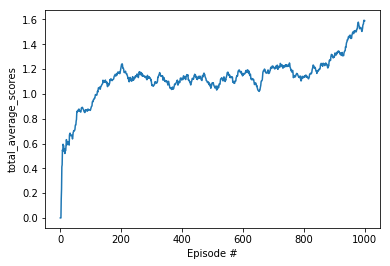

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs_deque)+1), meanRs_deque)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

### 6. Watch the agent running with saved weights

In [7]:
# Load the saved weights into Pytorch model
agent.g.load_state_dict(torch.load('g-reacher.pth', map_location='cpu'))
agent.d.load_state_dict(torch.load('d-reacher.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment (env)
s = env_info.vector_observations[0]                  # get the current state (s) (for an agent)
s_ = np.zeros_like(s)

R = 0                          # initialize the total score (R) (for an agent)

while True:
    s = np.reshape(s, [1, -1])
    s_ = np.reshape(s_, [1, -1])
    a = agent.act(s, s_) # select action (a) from loaded model agent
    
    #s2, r, done = env.step(s)
    env_info = env.step(a)[brain_name]           # send an action (a) to the environment (env)
    s2 = env_info.vector_observations[0]         # get next state (s2) (for an agent)
    r = env_info.rewards[0]                     # get reward (for an agent)
    done = env_info.local_done[0]               # see if the episode is done/finished (terminal) for an agent
    
    s2_, _ = agent.env(s, a)
    
    R += r                         # update the total score (R) (for an agent)
    s = s2                               # roll over current state (s) to next state (s2)
    s_ = s2_
    
    if done:                        # exit loop if episode is done/finished for an agent
        break
        
print('Average of total scores: {}'.format(R))

Average of total scores: 39.38999911956489


When finished, you can close the environment.

In [6]:
env.close()